In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from IPython.display import display

Note:
No discharge calculation for Sontek on Wednesday morning.
No discharge calculation for StreamPro on Thursday morning.

# Data

In [2]:
adv1 = read_csv('ADV Mon morning.csv', skipinitialspace=True, index_col=0)
adv2 = read_csv('ADV Mon afternoon.csv', skipinitialspace=True, index_col=0)
adv3 = read_csv('ADV Tue morning.csv', skipinitialspace=True, index_col=0)
adv4 = read_csv('ADV Tue afternoon.csv', skipinitialspace=True, index_col=0)
adv5 = read_csv('ADV Wed morning.csv', skipinitialspace=True, index_col=0)
adv6 = read_csv('ADV Wed afternoon.csv', skipinitialspace=True, index_col=0)
adv7 = read_csv('ADV Thur morning.csv', skipinitialspace=True, index_col=0)
distance = read_csv('distance.csv',skipinitialspace=True)
distance1 = read_csv('distance1.csv',skipinitialspace=True)
display(adv7)
display(distance)
display(distance1)

advtot = [adv1, adv2, adv3, adv4, adv5, adv6, adv7]
topdepth1 = [0.12, 0.12, 0.13, 0.11, 0.12, 0.13, 0.11]  # depth of middle top part for Sontek
topdepth2 = [0.19, 0.19, 0.19, 0.19, 0.19, 0.19] # depth of middle top part for StreamPro
depth_measure = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # depth of velocity
distance_left1 = [0.4, 0.4, 1, 0.9, 2.15, 2.25, 2.1]   # distance from bank to 5b for Sontek
distance_right1 = [0.4, 0.4, 0.73, 0.5, 1.2, 1.32, 0.98]  # distance from bank to the place where Sontek stops measuring
distance_left2 = [0.42, 0.42, 1.1, 0.97, 2.15, 2.15] # distance from bank to 5b for StreamPro
distance_right2 = [0.42, 0.42, 0.4, 0.45, 1.2, 1.32] # distance from bank to the place where StreamPro stops measuring

,Location,-0.05,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1,d_Sontek,td_Sontek,d_SstreamPro,td_SstreamPro
1a,15.74,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185,0.295,0,0.19
1b,15.32,0.01,0.01,0.02,0.01,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.220,0.330,0,0.19
1c,14.86,0.01,0.01,0.02,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.535,0.645,0,0.19
2,9.48,0.10,0.08,0.09,0.09,0.08,0.08,0.09,0.09,NaN,NaN,NaN,0.545,0.655,0,0.19
3,7.49,0.29,0.22,0.21,0.18,0.27,0.24,0.15,0.15,NaN,NaN,NaN,0.505,0.615,0,0.19
4,5.51,0.36,0.37,0.34,0.39,0.35,0.38,0.31,0.29,NaN,NaN,NaN,0.505,0.615,0,0.19
4b,0.81,0.14,0.10,0.09,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130,0.240,0,0.19
5a,0.41,0.07,0.07,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070,0.180,0,0.19
5b,0.00,0.06,0.08,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030,0.140,0,0.19
5c,-0.74,0.08,0.08,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030,0.140,0,0.19


,Mon morning,Mon afternoon,Tue morning,Tue afternoon,Wed morning,Wed afternoon,Thur morning
0,1.103870,0.702256,0.385505,0.229088,0,-0.199630,0.536200
1,0.311366,1.201397,0.255480,-0.023745,0,-0.462750,-0.685114
2,0.068111,0.408415,1.118353,0.477434,0,-0.128322,0.378358
3,0.645183,1.272618,0.404033,0.211353,0,-0.381584,0.346061
4,NaN,0.038302,0.690742,NaN,0,-0.051020,NaN
5,NaN,NaN,0.850575,NaN,0,-0.248169,NaN


,Mon morning,Mon afternoon,Tue morning,Tue afternoon,Wed morning,Wed afternoon
0,1.951343,1.455458,0.594521,2.818315,2.682058,0.129503
1,0.690105,1.950829,0.691249,0.217090,1.424329,0.141437
2,0.513799,0.424457,0.666021,0.461508,1.680705,1.129967
3,0.287475,0.327234,0.432438,1.403353,1.353087,0.309508
4,NaN,NaN,0.205159,NaN,1.401562,-0.614576
5,NaN,NaN,0.264629,NaN,1.942437,NaN
6,NaN,NaN,0.336391,NaN,NaN,NaN
7,NaN,NaN,0.450563,NaN,NaN,NaN


# For Sontek (NO Wednesday morning)

Left side discharge for Sontek 

In [3]:
# Monday morning
Q_L1 = distance_left1[0] * 0.25 / 2 * np.mean((np.mean(advtot[0].iloc[-1, 1:4]), 0)) # estimated depth
# Monday afternoon
Q_L2 = distance_left1[1] * 0.25 / 2 * np.mean((np.mean(advtot[1].iloc[-1, 1:4]), 0)) # estimated depth
# Tuesday ,Wednesday and Thursday
depth_3 = [0.375, 0.325, 0.31] # depth of 5b, 5c, 5d for Tuesday morning
depth_4 = [0.35, 0.34, 0.225] # depth of 5b, 5c, 5d for Tuesday afternoon
depth_5 = [0.255, 0.2, 0.19] # depth of 5b, 5c, 5d for Wednesday morning
depth_6 = [0.29, 0.23, 0.19] # depth of 5b, 5c, 5d for Wednesday afternoon
depth_7 = [0.25, 0.25, 0.25] # estimated depth for Thursday morning
d = np.vstack((depth_3, depth_4, depth_5, depth_6, depth_7))
Q_L = np.zeros(5)
for n in range(5):
    v = np.zeros(4)
    for i in range(3):
        ind = np.where(~np.isnan(advtot[n+2].iloc[i+8, 1:-4]))
        v[i] = np.mean(advtot[n+2].iloc[i+8, 1:np.max(ind)+2])
    v_mean = np.zeros(3)
    for j in range(3):
        v_mean[j] = np.mean((v[j], v[j+1]))
    Q = np.zeros(3)    
    for k in range(2):
        Q[k] = (d[n][k] + d[n][k+1]) * (advtot[n+2].iloc[k+8, 0] - advtot[n+2].iloc[k+9, 0]) / 2 * v_mean[k]
    Q[2] = v_mean[2] * d[n][2] * (distance_left1[n+2] + advtot[n+2].iloc[10, 0]) / 2
    Q_L[n] = np.sum(Q)
Q_Left = np.hstack((Q_L1, Q_L2, Q_L))
print('The left side discharge:', Q_Left)

The left side discharge: [-0.00158333 -0.00175     0.01229919  0.00904189  0.04351917  0.0357425
  0.022     ]


Right side discharge for Sontek

In [4]:
depth_1a = [0.25, 0.25, 0.35, 0.314, 0.26, 0.24, 0.25] #depth on Monday and Thursday is estimated
depth_1b = [0.25, 0.25, 0.41, 0.35, 0.34, 0.31, 0.45] #depth on Monday and Thursday is estimated
depth_1c = [0.35, 0.35, 0.415, 0.411, 0.43, 0.44, 0.35] #depth on Monday and Thursday is estimated
depth_2 = [0.55, 0.55, 0.58, 0.55, 0.77, 0.73, 0.75] #depth on Monday and Thursday is estimated
q1 = np.zeros(4)
q2 = np.zeros(5) 
q3 = np.zeros(6) 
q4 = np.zeros(4)
q5 = np.zeros(6)
q6 = np.zeros(6) 
q7 = np.zeros(4)
Q_right = [q1, q2, q3, q4, q5, q6, q7]
for i in range(7):
    ind1 = np.where(~np.isnan(distance.iloc[:, i]))
    Q_right[i] = np.zeros(np.max(ind1)+1)
    for j in range(np.max(ind1)+1):
        if distance.iloc[j, i] > 0:
            ind2 = np.where(~np.isnan(advtot[i].iloc[0, 1:-4])) 
            v = np.mean((0, np.mean((advtot[i].iloc[0, 1:np.max(ind2)+2]))))
            Q_right[i][j] = v * distance_right1[i] * (distance_right1[i] / (distance_right1[i] + distance.iloc[j, i])) / 2
        else:
            if -distance.iloc[j, i] < (advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]):
                ind3 = np.where(~np.isnan(advtot[i].iloc[0, 1:-4])) 
                v = np.mean((advtot[i].iloc[0, 1:np.max(ind3)+2]))
                Q_right[i][j] = v * distance_right1[i] * np.mean((depth_1a[i], depth_1b[i])) / 2
            elif (advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]) < -distance.iloc[j, i] < (advtot[i].iloc[0, 0] - advtot[i].iloc[2, 0]):
                ind4 = np.where(~np.isnan(advtot[i].iloc[0, 1:-4]))
                ind5 = np.where(~np.isnan(advtot[i].iloc[1, 1:-4]))
                v1 = np.mean((advtot[i].iloc[0, 1:np.max(ind4)+2]))
                v2 = np.mean((advtot[i].iloc[1, 1:np.max(ind5)+2]))
                b1 = (distance_right1[i] + distance.iloc[j, i] + (advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]) / 2) 
                Q1 = v1 * b1 * np.mean((depth_1a[i], depth_1b[i])) / 2
                b2 = np.mean((depth_1a[i], depth_1b[i])) + np.mean((depth_1b[i], depth_1c[i]))
                h2 = -distance.iloc[j, i] - ((advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]) / 2)
                Q2 = b2 * h2 / 2 * v2
                Q_right[i][j] = Q1 + Q2     
print(Q_right)           

[array([8.86601492e-05, 1.87432749e-04, 2.84832775e-04, 1.27569334e-04]), array([0.00036289, 0.00024978, 0.0004948 , 0.00023915, 0.00091261]), array([0.00627009, 0.00709737, 0.00378408, 0.00616764, 0.004923  ,
       0.00442517]), array([0.00300032, 0.002905  , 0.002238  , 0.00307512]), array([0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012]), array([0.00968   , 0.01511309, 0.00968   , 0.00968   , 0.00968   ,
       0.00968   ]), array([0.00105571, 0.00379605, 0.00117838, 0.00120708])]


Top discharge for Sontek

In [5]:
q1 = np.zeros(4)
q2 = np.zeros(5) 
q3 = np.zeros(6) 
q4 = np.zeros(4)
q5 = np.zeros(6)
q6 = np.zeros(6) 
q7 = np.zeros(4)
Q_top = [q1, q2, q3, q4, q5, q6, q7]
v_top = np.zeros((7, 8))
for i in range(7):
    for j in range(8):
        v_top[i, j] = np.mean(advtot[i].iloc[j, 1:3])
for k in range(7):
    ind1 = np.where(~np.isnan(distance.iloc[:, k]))
    Q_top[k] = np.zeros(np.max(ind1)+1)
    for l in range(np.max(ind1)+1):
        if distance.iloc[l, k] > 0:
            Q = np.zeros(8)
            Q[0] = (distance.iloc[l, k] + (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) / 2) * topdepth1[k] * v_top[k, 0]
            for m in range(6):
                b = (advtot[k].iloc[m, 0] - advtot[k].iloc[m+1, 0]) / 2 + (advtot[k].iloc[m+1, 0] - advtot[k].iloc[m+2, 0]) / 2
                Q[m+1] = v_top[k, m+1] * topdepth1[k] * b
            Q[7] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * topdepth1[k] *  v_top[k, 7]
            Q_top[k][l] = np.sum(Q)
        else:
            if -distance.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]):
                Q = np.zeros(7) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0] + distance.iloc[l, k]) * topdepth1[k] * v_top[k, 1]
                for n in range(5):
                    b = (advtot[k].iloc[n+1, 0] - advtot[k].iloc[n+2, 0]) / 2 + (advtot[k].iloc[n+2, 0] - advtot[k].iloc[n+3, 0]) / 2
                    Q[n+1] = v_top[k, n+2] * topdepth1[k] * b
                Q[6] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * topdepth1[k] *  v_top[k, 7]
                Q_top[k][l] = np.sum(Q)
            elif (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) < -distance.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0]):
                Q = np.zeros(6) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0] + distance.iloc[l, k]) * topdepth1[k] * v_top[k, 2]
                for o in range(4):
                    b = (advtot[k].iloc[o+2, 0] - advtot[k].iloc[o+3, 0]) / 2 + (advtot[k].iloc[o+3, 0] - advtot[k].iloc[o+4, 0]) / 2
                    Q[o+1] = v_top[k, o+3] * topdepth1[k] * b
                Q[5] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * topdepth1[k] *  v_top[k, 7]
                Q_top[k][l] = np.sum(Q)
print(Q_top)

[array([0.32925368, 0.32972918, 0.32987513, 0.32952889]), array([0.40524871, 0.40584768, 0.4048961 , 0.40593314, 0.40445196]), array([0.41461294, 0.41359874, 0.42032915, 0.41475746, 0.41699379,
       0.41824048]), array([0.33173899, 0.32990652, 0.3329683 , 0.3316512 ]), array([0.269325, 0.269325, 0.269325, 0.269325, 0.269325, 0.269325]), array([0.42746407, 0.39773744, 0.42834472, 0.42521694, 0.4292994 ,
       0.42686462]), array([0.26831475, 0.26483312, 0.26831475, 0.26831475])]


Middle discharge for Sontek

In [6]:
q1 = np.zeros(4)
q2 = np.zeros(5) 
q3 = np.zeros(6) 
q4 = np.zeros(4)
q5 = np.zeros(6)
q6 = np.zeros(6) 
q7 = np.zeros(4)
Q_middle = [q1, q2, q3, q4, q5, q6, q7]
v_middle = np.zeros((7, 8))
for i in range(7):
    for j in range(8):
        if advtot[i].iloc[j, -3] <= 0.2:
            v_middle[i, j] = np.mean(advtot[i].iloc[j, 2:4])
        else:
            ind_d = np.where(depth_measure <= advtot[i].iloc[j, -3])
            ind_v = np.where(~np.isnan(advtot[i].iloc[j, 1:np.max(ind_d)+2]))
            v_middle[i, j] = np.mean(advtot[i].iloc[j, 3:np.max(ind_v)+2])           
for k in range(7):
    ind1 = np.where(~np.isnan(distance.iloc[:, k]))
    Q_middle[k] = np.zeros(np.max(ind1)+1)
    for l in range(np.max(ind1)+1):
        if distance.iloc[l, k] > 0:
            Q = np.zeros(8)
            Q[0] = (distance.iloc[l, k] + (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) / 2) * 2 * advtot[k].iloc[0, -4] / 2 * v_middle[k, 0]
            for m in range(6):
                b = (advtot[k].iloc[m, 0] - advtot[k].iloc[m+1, 0]) / 2 + (advtot[k].iloc[m+1, 0] - advtot[k].iloc[m+2, 0]) / 2
                Q[m+1] = v_middle[k, m+1] * (2 * advtot[k].iloc[m+1, -4]) * b / 2
            Q[7] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * (2 * advtot[k].iloc[7, -4]) *  v_middle[k, 7] /2
            Q_middle[k][l] = np.sum(Q)
        else:
            if -distance.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]):
                Q = np.zeros(7) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0] + distance.iloc[l, k]) * 2 * advtot[k].iloc[1, -4] / 2 * v_middle[k, 1]
                for n in range(5):
                    b = (advtot[k].iloc[n+1, 0] - advtot[k].iloc[n+2, 0]) / 2 + (advtot[k].iloc[n+2, 0] - advtot[k].iloc[n+3, 0]) / 2
                    Q[n+1] =v_middle[k, n+2] * (2 * advtot[k].iloc[n+2, -4]) * b / 2
                Q[6] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * (2 * advtot[k].iloc[7, -4]) *  v_middle[k, 7] / 2
                Q_middle[k][l] = np.sum(Q)
            elif (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) < -distance.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0]):
                Q = np.zeros(6) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0] + distance.iloc[l, k]) * 2 * advtot[k].iloc[2, -4] / 2 * v_middle[k, 2]
                for o in range(4):
                    b = (advtot[k].iloc[o+2, 0] - advtot[k].iloc[o+3, 0]) / 2 + (advtot[k].iloc[o+3, 0] - advtot[k].iloc[o+4, 0]) / 2
                    Q[o+1] = v_middle[k, o+3] * (2 * advtot[k].iloc[o+3, -4]) * b / 2
                Q[5] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * (2 * advtot[k].iloc[7, -4]) *  v_middle[k, 7] / 2
                Q_middle[k][l] = np.sum(Q)
print(Q_middle)

[array([0.949481, 0.949481, 0.949481, 0.949481]), array([0.96343428, 0.9637737 , 0.96323447, 0.96382213, 0.9629828 ]), array([0.70272292, 0.70165021, 0.70876891, 0.70287578, 0.70524112,
       0.70655974]), array([0.80845079, 0.80661276, 0.80956835, 0.80837099]), array([0., 0., 0., 0., 0., 0.]), array([1.08062413, 1.0202336 , 1.08115894, 1.07925948, 1.0817387 ,
       1.08026009]), array([1.03318944, 1.01439714, 1.03260542, 1.03248593])]


In [7]:
import pandas as pd
tuples = [('Mon morning', '1'), ('Mon morning', '2'),('Mon morning', '3'), ('Mon morning', '4'),
          ('Mon afternoon', '1'), ('Mon afternoon', '2'),('Mon afternoon', '3'), ('Mon afternoon', '4'), ('Mon afternoon', '5'),
          ('Tue morning', '1'), ('Tue morning', '2'),('Tue morning', '3'), ('Tue morning', '4'), ('Tue morning', '5'), ('Tue morning', '6'),
          ('Tue afternoon', '1'), ('Tue afternoon', '2'),('Tue afternoon', '3'), ('Tue afternoon', '4'), 
          ('Wed afternoon', '1'), ('Wed afternoon', '2'),('Wed afternoon', '3'), ('Wed afternoon', '4'), ('Wed afternoon', '5'), ('Wed afternoon', '6'),
          ('Thur morning', '1'), ('Thur morning', '2'),('Thur morning', '3'), ('Thur morning', '4')]
index = pd.MultiIndex.from_tuples(tuples)
d1 = pd.DataFrame(columns=['Left side(m3/s)', 'Top(m3/s)', 'Middle(m3/s)', 'Right side(m3/s)'], index=index)
Q = [Q_Left, Q_top, Q_middle, Q_right]
for i in range(4):
    d1.iloc[0:4,i] = Q[i][0]
    d1.iloc[4:9,i] = Q[i][1]
    d1.iloc[9:15,i] = Q[i][2]
    d1.iloc[15:19,i] = Q[i][3]
    d1.iloc[19:25,i] = Q[i][5]
    d1.iloc[25:,i] = Q[i][6]
display(d1)
d1.to_csv(path_or_buf='ADV-Sontek-discharge per measurement.csv')

Left side(m3/s) Top(m3/s) Middle(m3/s) Right side(m3/s)
Mon morning   1     -0.00158333  0.329254     0.949481      8.86601e-05
              2     -0.00158333  0.329729     0.949481      0.000187433
              3     -0.00158333  0.329875     0.949481      0.000284833
              4     -0.00158333  0.329529     0.949481      0.000127569
Mon afternoon 1        -0.00175  0.405249     0.963434      0.000362892
              2        -0.00175  0.405848     0.963774      0.000249782
              3        -0.00175  0.404896     0.963234      0.000494795
              4        -0.00175  0.405933     0.963822      0.000239146
              5        -0.00175  0.404452     0.962983      0.000912612
Tue morning   1       0.0122992  0.414613     0.702723       0.00627009
              2       0.0122992  0.413599      0.70165       0.00709737
              3       0.0122992  0.420329     0.708769       0.00378408
              4       0.0122992  0.414757     0.702876       0.00616764
              5       0.0122992  0.416994     0.705241         0.004923
              6       0.0122992   0.41824      0.70656       0.00442517
Tue afternoon 1      0.00904189  0.331739     0.808451       0.00300032
              2      0.00904189  0.329907     0.806613         0.002905
              3      0.00904189  0.332968     0.809568         0.002238
              4      0.00904189  0.331651     0.808371       0.00307512
Wed afternoon 1       0.0357425  0.427464      1.08062          0.00968
              2       0.0357425  0.397737      1.02023        0.0151131
              3       0.0357425  0.428345      1.08116          0.00968
              4       0.0357425  0.425217      1.07926          0.00968
              5       0.0357425  0.429299      1.08174          0.00968
              6       0.0357425  0.426865      1.08026          0.00968
Thur morning  1           0.022  0.268315      1.03319       0.00105571
              2           0.022  0.264833       1.0144       0.00379605
              3           0.022  0.268315      1.03261       0.00117838
              4           0.022  0.268315      1.03249       0.00120708

In [8]:
d2 = pd.DataFrame(columns=['Left side(m3/s)', 'Top(m3/s)', 'Middle(m3/s)', 'Right side(m3/s)'],
                 index=['Mon morning','Mon afternoon', 'Tue morning', 
                        'Tue afternoon', 'Wed afternoon', 'Thur morning'])
Q = [Q_Left, Q_top, Q_middle, Q_right]
for i in range(4):
    d2.iloc[0, i] = np.mean(Q[i][0])
    d2.iloc[1, i] = np.mean(Q[i][1])
    d2.iloc[2, i] = np.mean(Q[i][2])
    d2.iloc[3, i] = np.mean(Q[i][3])
    d2.iloc[4, i] = np.mean(Q[i][5])
    d2.iloc[5, i] = np.mean(Q[i][6])
display(d2)
d2.to_csv(path_or_buf='ADV-Sontek-discharge per day part.csv')

,Left side(m3/s),Top(m3/s),Middle(m3/s),Right side(m3/s)
Mon morning,-0.00158333,0.329597,0.949481,0.000172124
Mon afternoon,-0.00175,0.405276,0.963449,0.000451845
Tue morning,0.0122992,0.416422,0.704636,0.00544456
Tue afternoon,0.00904189,0.331566,0.808251,0.00280461
Wed afternoon,0.0357425,0.422488,1.07055,0.0105855
Thur morning,0.022,0.267444,1.02817,0.00180931


# For StreamPro

Left side discharge for Sontek (No Thursday morning)

In [9]:
# Monday morning
Q_L1 = distance_left2[0] * 0.25 / 2 * np.mean((np.mean(advtot[0].iloc[-1, 1:4]), 0)) # estimated depth
# Monday afternoon
Q_L2 = distance_left2[1] * 0.25 / 2 * np.mean((np.mean(advtot[1].iloc[-1, 1:4]), 0)) # estimated depth
# Tuesday ,Wednesday 
depth_3 = [0.375, 0.325, 0.31] # depth of 5b, 5c, 5d for Tuesday morning
depth_4 = [0.35, 0.34, 0.225] # depth of 5b, 5c, 5d for Tuesday afternoon
depth_5 = [0.29, 0.23, 0.19] # depth of 5b, 5c, 5d for Wednesday afternoon
depth_6 = [0.29, 0.23, 0.19] # depth of 5b, 5c, 5d for Wednesday afternoon
d = np.vstack((depth_3, depth_4, depth_5, depth_6))
Q_L = np.zeros(4)
for n in range(4):
    v = np.zeros(4)
    for i in range(3):
        ind = np.where(~np.isnan(advtot[n+2].iloc[i+8, 1:-4]))
        v[i] = np.mean(advtot[n+2].iloc[i+8, 1:np.max(ind)+2])
    v_mean = np.zeros(3)
    for j in range(3):
        v_mean[j] = np.mean((v[j], v[j+1]))
    Q = np.zeros(3)    
    for k in range(2):
        Q[k] = (d[n][k] + d[n][k+1]) * (advtot[n+2].iloc[k+8, 0] - advtot[n+2].iloc[k+9, 0]) / 2 * v_mean[k]
    Q[2] = v_mean[2] * d[n][2] * (distance_left2[n+2] + advtot[n+2].iloc[10, 0]) / 2
    Q_L[n] = np.sum(Q)
Q_Left1 = np.hstack((Q_L1, Q_L2, Q_L))
print('The left side discharge:', Q_Left1)

The left side discharge: [-0.0016625  -0.0018375   0.01255106  0.00921251  0.04902583  0.03541   ]


Right side discharge for StreamPro

In [10]:
depth_1a = [0.25, 0.25, 0.35, 0.314, 0.26, 0.24] #depth on Monday is estimated
depth_1b = [0.25, 0.25, 0.41, 0.35, 0.34, 0.31] #depth on Monday is estimated
depth_1c = [0.35, 0.35, 0.415, 0.411, 0.43, 0.44] #depth on Monday is estimated
depth_2 = [0.55, 0.55, 0.58, 0.55, 0.77, 0.73] #depth on Monday is estimated
q1 = np.zeros(4)
q2 = np.zeros(4) 
q3 = np.zeros(8) 
q4 = np.zeros(4)
q5 = np.zeros(6)
q6 = np.zeros(5) 
Q_right1 = [q1, q2, q3, q4, q5, q6]
for i in range(6):
    ind1 = np.where(~np.isnan(distance1.iloc[:, i]))
    Q_right1[i] = np.zeros(np.max(ind1)+1)
    for j in range(np.max(ind1)+1):
        if distance1.iloc[j, i] > 0:
            ind2 = np.where(~np.isnan(advtot[i].iloc[0, 1:-4])) 
            v = np.mean((0, np.mean((advtot[i].iloc[0, 1:np.max(ind2)+2]))))
            Q_right1[i][j] = v * distance_right2[i] * (distance_right2[i] / (distance_right2[i] + distance1.iloc[j, i])) / 2
        else:
            if -distance1.iloc[j, i] < (advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]):
                ind3 = np.where(~np.isnan(advtot[i].iloc[0, 1:-4])) 
                v = np.mean((advtot[i].iloc[0, 1:np.max(ind3)+2]))
                Q_right1[i][j] = v * distance_right2[i] * np.mean((depth_1a[i], depth_1b[i])) / 2
            elif (advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]) < -distance1.iloc[j, i] < (advtot[i].iloc[0, 0] - advtot[i].iloc[2, 0]):
                ind4 = np.where(~np.isnan(advtot[i].iloc[0, 1:-4]))
                ind5 = np.where(~np.isnan(advtot[i].iloc[1, 1:-4]))
                v1 = np.mean((advtot[i].iloc[0, 1:np.max(ind4)+2]))
                v2 = np.mean((advtot[i].iloc[1, 1:np.max(ind5)+2]))
                b1 = (distance_right2[i] + distance1.iloc[j, i] + (advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]) / 2) 
                Q1 = v1 * b1 * np.mean((depth_1a[i], depth_1b[i])) / 2
                b2 = np.mean((depth_1a[i], depth_1b[i])) + np.mean((depth_1b[i], depth_1c[i]))
                h2 = -distance1.iloc[j, i] - ((advtot[i].iloc[0, 0] - advtot[i].iloc[1, 0]) / 2)
                Q2 = b2 * h2 / 2 * v2
                Q_right1[i][j] = Q1 + Q2     
print(Q_right1)           

[array([6.19901991e-05, 1.32419940e-04, 1.57421379e-04, 2.07781170e-04]), array([0.00023514, 0.00018601, 0.00052223, 0.00059018]), array([0.00211157, 0.0019244 , 0.00196994, 0.00252271, 0.00347016,
       0.00315966, 0.00285175, 0.00246895]), array([0.00054214, 0.00265613, 0.00194389, 0.00095604]), array([0.00061823, 0.00091452, 0.00083313, 0.00094004, 0.00092252,
       0.00076374]), array([0.01602757, 0.01589669, 0.00948258, 0.01425707, 0.0181939 ])]


Top discharge for StreamPro

In [11]:
q1 = np.zeros(4)
q2 = np.zeros(4) 
q3 = np.zeros(8) 
q4 = np.zeros(4)
q5 = np.zeros(6)
q6 = np.zeros(5)
Q_top1 = [q1, q2, q3, q4, q5, q6]
v_top = np.zeros((6, 8))
for i in range(6):
    for j in range(8):
        v_top[i, j] = np.mean(advtot[i].iloc[j, 1:3])
for k in range(6):
    ind1 = np.where(~np.isnan(distance1.iloc[:, k]))
    Q_top1[k] = np.zeros(np.max(ind1)+1)
    for l in range(np.max(ind1)+1):
        if distance1.iloc[l, k] > 0:
            Q = np.zeros(8)
            Q[0] = (distance1.iloc[l, k] + (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) / 2) * topdepth2[k] * v_top[k, 0]
            for m in range(6):
                b = (advtot[k].iloc[m, 0] - advtot[k].iloc[m+1, 0]) / 2 + (advtot[k].iloc[m+1, 0] - advtot[k].iloc[m+2, 0]) / 2
                Q[m+1] = v_top[k, m+1] * topdepth2[k] * b
            Q[7] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * topdepth2[k] *  v_top[k, 7]
            Q_top1[k][l] = np.sum(Q)
        else:
            if -distance1.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]):
                Q = np.zeros(7) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0] + distance1.iloc[l, k]) * topdepth2[k] * v_top[k, 1]
                for n in range(5):
                    b = (advtot[k].iloc[n+1, 0] - advtot[k].iloc[n+2, 0]) / 2 + (advtot[k].iloc[n+2, 0] - advtot[k].iloc[n+3, 0]) / 2
                    Q[n+1] = v_top[k, n+2] * topdepth2[k] * b
                Q[6] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * topdepth2[k] *  v_top[k, 7]
                Q_top1[k][l] = np.sum(Q)
            elif (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) < -distance1.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0]):
                Q = np.zeros(6) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0] + distance1.iloc[l, k]) * topdepth2[k] * v_top[k, 2]
                for o in range(4):
                    b = (advtot[k].iloc[o+2, 0] - advtot[k].iloc[o+3, 0]) / 2 + (advtot[k].iloc[o+3, 0] - advtot[k].iloc[o+4, 0]) / 2
                    Q[o+1] = v_top[k, o+3] * topdepth2[k] * b
                Q[5] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * topdepth2[k] *  v_top[k, 7]
                Q_top1[k][l] = np.sum(Q)
print(Q_top1)

[array([0.52051322, 0.5217114 , 0.52187889, 0.5220939 ]), array([0.64307487, 0.64401608, 0.64111597, 0.64093124]), array([0.60835554, 0.60945824, 0.60917064, 0.6065078 , 0.60391682,
       0.60459477, 0.60541286, 0.60671441]), array([0.59514159, 0.57290112, 0.57499089, 0.58304367]), array([0.42909321, 0.42789836, 0.42814192, 0.42783068, 0.42787673,
       0.42839057]), array([0.6318398 , 0.63196451, 0.64229466, 0.63372085, 0.57914504])]


Middle discharge for StreamPro

In [12]:
q1 = np.zeros(4)
q2 = np.zeros(4) 
q3 = np.zeros(8) 
q4 = np.zeros(4)
q5 = np.zeros(6)
q6 = np.zeros(5)
Q_middle1 = [q1, q2, q3, q4, q5, q6]
v_middle = np.zeros((6, 8))
for i in range(6):
    for j in range(8):
        if advtot[i].iloc[j, -1] <= 0.2:
            v_middle[i, j] = np.mean(advtot[i].iloc[j, 2:4])
        else:
            ind_d = np.where(depth_measure <= advtot[i].iloc[j, -1])
            ind_v = np.where(~np.isnan(advtot[i].iloc[j, 1:np.max(ind_d)+2]))
            if np.max(ind_v) <= 1:
                v_middle[i, j] = np.mean(advtot[i].iloc[j, 2:4])
            else:
                v_middle[i, j] = np.mean(advtot[i].iloc[j, 3:np.max(ind_v)+2])  
for k in range(6):
    ind1 = np.where(~np.isnan(distance1.iloc[:, k]))
    Q_middle1[k] = np.zeros(np.max(ind1)+1)
    for l in range(np.max(ind1)+1):
        if distance1.iloc[l, k] > 0:
            Q = np.zeros(8)
            Q[0] = (distance1.iloc[l, k] + (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) / 2) * 2 * advtot[k].iloc[0, -2] / 2 * v_middle[k, 0]
            for m in range(6):
                b = (advtot[k].iloc[m, 0] - advtot[k].iloc[m+1, 0]) / 2 + (advtot[k].iloc[m+1, 0] - advtot[k].iloc[m+2, 0]) / 2
                Q[m+1] = v_middle[k, m+1] * (2 * advtot[k].iloc[m+1, -2]) * b / 2
            Q[7] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * (2 * advtot[k].iloc[7, -2]) *  v_middle[k, 7] /2
            Q_middle1[k][l] = np.sum(Q)
        else:
            if -distance1.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]):
                Q = np.zeros(7) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0] + distance1.iloc[l, k]) * 2 * advtot[k].iloc[1, -2] / 2 * v_middle[k, 1]
                for n in range(5):
                    b = (advtot[k].iloc[n+1, 0] - advtot[k].iloc[n+2, 0]) / 2 + (advtot[k].iloc[n+2, 0] - advtot[k].iloc[n+3, 0]) / 2
                    Q[n+1] =v_middle[k, n+2] * (2 * advtot[k].iloc[n+2, -2]) * b / 2
                Q[6] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * (2 * advtot[k].iloc[7, -2]) *  v_middle[k, 7] / 2
                Q_middle1[k][l] = np.sum(Q)
            elif (advtot[k].iloc[0, 0] - advtot[k].iloc[1, 0]) < -distance1.iloc[l, k] < (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0]):
                Q = np.zeros(6) 
                Q[0] = (advtot[k].iloc[0, 0] - advtot[k].iloc[2, 0] + distance1.iloc[l, k]) * 2 * advtot[k].iloc[2, -2] / 2 * v_middle[k, 2]
                for o in range(4):
                    b = (advtot[k].iloc[o+2, 0] - advtot[k].iloc[o+3, 0]) / 2 + (advtot[k].iloc[o+3, 0] - advtot[k].iloc[o+4, 0]) / 2
                    Q[o+1] = v_middle[k, o+3] * (2 * advtot[k].iloc[o+3, -2]) * b / 2
                Q[5] = ((advtot[k].iloc[6, 0] - advtot[k].iloc[7, 0]) / 2 + advtot[k].iloc[7, 0] - advtot[k].iloc[8, 0]) * (2 * advtot[k].iloc[7, -2]) *  v_middle[k, 7] / 2
                Q_middle1[k][l] = np.sum(Q)
print(Q_middle1)

[array([0.97328596, 0.97202472, 0.97184841, 0.97162209]), array([1.02344676, 1.02394213, 1.02241576, 1.02231853]), array([1.1456234 , 1.14674968, 1.14645593, 1.14373616, 1.14108977,
       1.14178222, 1.1426178 , 1.14394719]), array([1.13819753, 1.12242761, 1.12390939, 1.12961933]), array([1.05673866, 1.05114176, 1.05228264, 1.05082474, 1.05104045,
       1.05344735]), array([1.49333336, 1.4934527 , 1.50333801, 1.49513341, 1.41234429])]


In [13]:
import pandas as pd
tuples = [('Mon morning', '1'), ('Mon morning', '2'),('Mon morning', '3'), ('Mon morning', '4'),
          ('Mon afternoon', '1'), ('Mon afternoon', '2'),('Mon afternoon', '3'), ('Mon afternoon', '4'), 
          ('Tue morning', '1'), ('Tue morning', '2'),('Tue morning', '3'), ('Tue morning', '4'), ('Tue morning', '5'), ('Tue morning', '6'), ('Tue morning', '7'), ('Tue morning', '8'),
          ('Tue afternoon', '1'), ('Tue afternoon', '2'),('Tue afternoon', '3'), ('Tue afternoon', '4'),
          ('Wed morning', '1'), ('Wed morning', '2'), ('Wed morning', '3'), ('Wed morning', '4'), ('Wed morning', '5'), ('Wed morning', '6'),
          ('Wed afternoon', '1'), ('Wed afternoon', '2'),('Wed afternoon', '3'), ('Wed afternoon', '4'), ('Wed afternoon', '5')]
index = pd.MultiIndex.from_tuples(tuples)
d3 = pd.DataFrame(columns=['Left side(m3/s)', 'Top(m3/s)', 'Middle(m3/s)', 'Right side(m3/s)'], index=index)
Q = [Q_Left1, Q_top1, Q_middle1, Q_right1]
for i in range(4):
    d3.iloc[0:4,i] = Q[i][0]
    d3.iloc[4:8,i] = Q[i][1]
    d3.iloc[8:16,i] = Q[i][2]
    d3.iloc[16:20,i] = Q[i][3]
    d3.iloc[20:26,i] = Q[i][4]
    d3.iloc[26:,i] = Q[i][5]
display(d3)
d3.to_csv(path_or_buf='ADV-StreamPro-discharge per measurement.csv')

Left side(m3/s) Top(m3/s) Middle(m3/s) Right side(m3/s)
Mon morning   1      -0.0016625  0.520513     0.973286      6.19902e-05
              2      -0.0016625  0.521711     0.972025       0.00013242
              3      -0.0016625  0.521879     0.971848      0.000157421
              4      -0.0016625  0.522094     0.971622      0.000207781
Mon afternoon 1      -0.0018375  0.643075      1.02345      0.000235143
              2      -0.0018375  0.644016      1.02394      0.000186011
              3      -0.0018375  0.641116      1.02242      0.000522229
              4      -0.0018375  0.640931      1.02232      0.000590177
Tue morning   1       0.0125511  0.608356      1.14562       0.00211157
              2       0.0125511  0.609458      1.14675        0.0019244
              3       0.0125511  0.609171      1.14646       0.00196994
              4       0.0125511  0.606508      1.14374       0.00252271
              5       0.0125511  0.603917      1.14109       0.00347016
              6       0.0125511  0.604595      1.14178       0.00315966
              7       0.0125511  0.605413      1.14262       0.00285175
              8       0.0125511  0.606714      1.14395       0.00246895
Tue afternoon 1      0.00921251  0.595142       1.1382      0.000542137
              2      0.00921251  0.572901      1.12243       0.00265613
              3      0.00921251  0.574991      1.12391       0.00194389
              4      0.00921251  0.583044      1.12962      0.000956037
Wed morning   1       0.0490258  0.429093      1.05674      0.000618229
              2       0.0490258  0.427898      1.05114      0.000914519
              3       0.0490258  0.428142      1.05228       0.00083313
              4       0.0490258  0.427831      1.05082      0.000940038
              5       0.0490258  0.427877      1.05104      0.000922523
              6       0.0490258  0.428391      1.05345      0.000763738
Wed afternoon 1         0.03541   0.63184      1.49333        0.0160276
              2         0.03541  0.631965      1.49345        0.0158967
              3         0.03541  0.642295      1.50334       0.00948258
              4         0.03541  0.633721      1.49513        0.0142571
              5         0.03541  0.579145      1.41234        0.0181939

In [14]:
d4 = pd.DataFrame(columns=['Left side(m3/s)', 'Top(m3/s)', 'Middle(m3/s)', 'Right side(m3/s)'],
                 index=['Mon morning','Mon afternoon', 'Tue morning', 
                        'Tue afternoon', 'Wed morning','Wed afternoon'])
Q = [Q_Left1, Q_top1, Q_middle1, Q_right1]
for i in range(6):
    for j in range(4):
        d4.iloc[i, j] = np.mean(Q[j][i])
display(d4)
d4.to_csv(path_or_buf='ADV-StreamPro-discharge per day part.csv')

,Left side(m3/s),Top(m3/s),Middle(m3/s),Right side(m3/s)
Mon morning,-0.0016625,0.521549,0.972195,0.000139903
Mon afternoon,-0.0018375,0.642285,1.02303,0.00038339
Tue morning,0.0125511,0.606766,1.144,0.00255989
Tue afternoon,0.00921251,0.581519,1.12854,0.00152455
Wed morning,0.0490258,0.428205,1.05258,0.00083203
Wed afternoon,0.03541,0.623793,1.47952,0.0147716


# Velocity profile

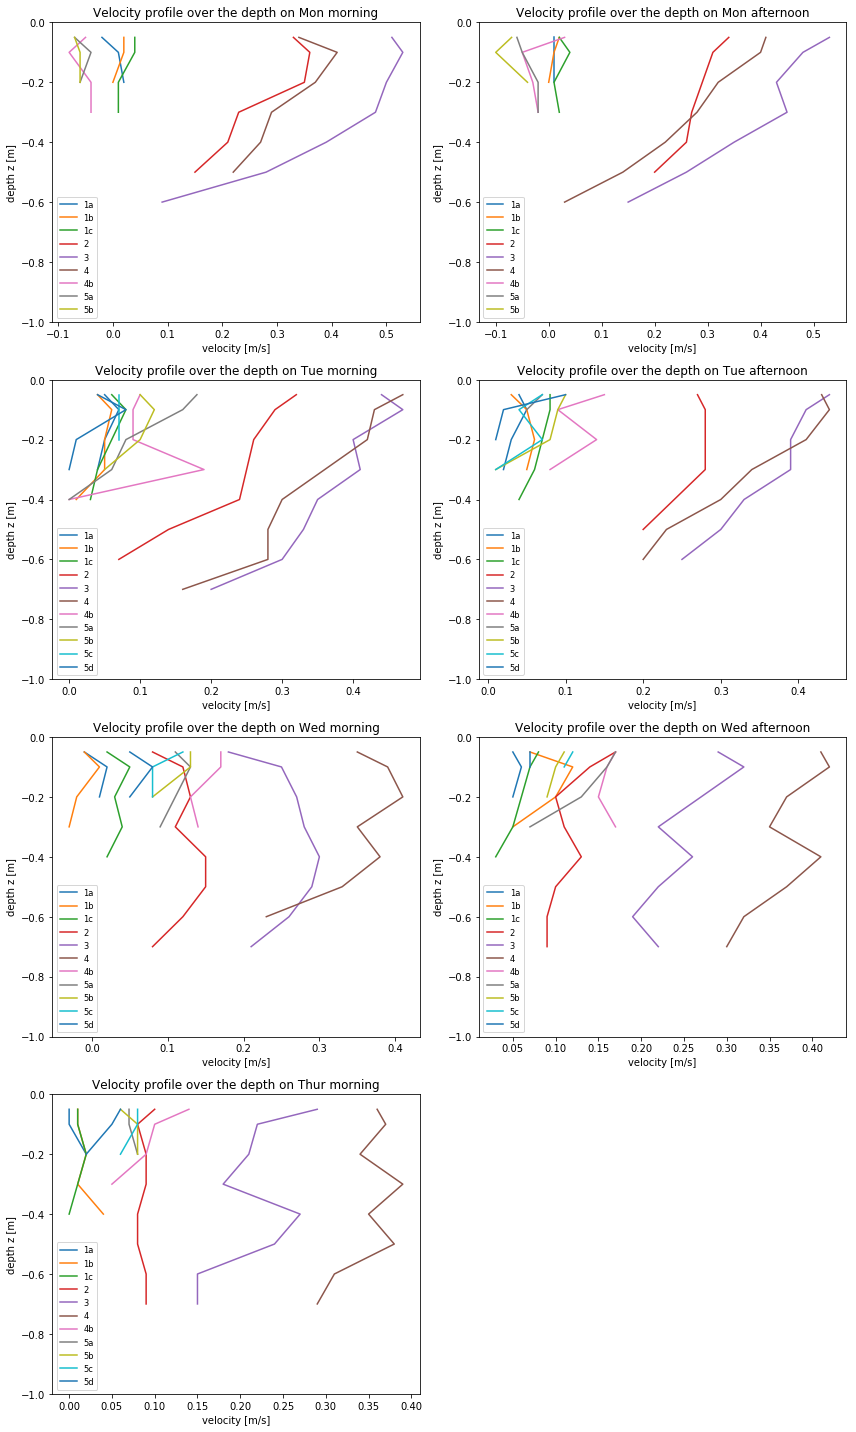

In [15]:
depth = np.array([-0.05, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1])
time = ['Mon morning', 'Mon afternoon', 'Tue morning', 'Tue afternoon', 'Wed morning', 'Wed afternoon', 'Thur morning']
plt.figure(figsize=(12,20))
for n in range(7):
    x = advtot[n].iloc[:,0]
    n_loc = advtot[n].shape[0]
    n_dep = advtot[n].shape[1] - 5
    vertical = ['1a', '1b', '1c', '2', '3', '4', '4b', '5a', '5b', '5c', '5d']
    vel = np.zeros((n_loc,n_dep))
    plt.subplot(421+n)
    for i in range(n_loc):
        vel[i, :] = advtot[n].iloc[i,1:-4]
        plt.plot(vel[i,:], depth, label = vertical[i])
    plt.xlabel('velocity [m/s]')
    plt.ylabel('depth z [m]')
    plt.title('Velocity profile over the depth on '+ time[n])
    plt.ylim(-1,0)
    plt.legend(loc='best', fontsize='small')
    plt.tight_layout();